In [ ]:
!pip install facenet-pytorch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_nvjitlink_cu12-12.6.20-py3-none-manyl

In [ ]:
from facenet_pytorch import InceptionResnetV1

In [ ]:
model = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
!unzip faces2.zip

Archive:  faces2.zip
   creating: faces/
   creating: faces/Alexandra Daddario/
  inflating: faces/Alexandra Daddario/Alexandra Daddario_0.jpg  
  inflating: faces/Alexandra Daddario/Alexandra Daddario_1.jpg  
  inflating: faces/Alexandra Daddario/Alexandra Daddario_2.jpg  
  inflating: faces/Alexandra Daddario/Alexandra Daddario_4.jpg  
  inflating: faces/Alexandra Daddario/Alexandra Daddario_91.jpg  
   creating: faces/Andy Samberg/
  inflating: faces/Andy Samberg/Andy Samberg_0.jpg  
  inflating: faces/Andy Samberg/Andy Samberg_1.jpg  
  inflating: faces/Andy Samberg/Andy Samberg_2.jpg  
  inflating: faces/Andy Samberg/Andy Samberg_3.jpg  
  inflating: faces/Andy Samberg/Andy Samberg_91.jpg  
   creating: faces/Billie Eilish/
  inflating: faces/Billie Eilish/Billie Eilish_0.jpg  
  inflating: faces/Billie Eilish/Billie Eilish_1.jpg  
  inflating: faces/Billie Eilish/Billie Eilish_2.jpg  
  inflating: faces/Billie Eilish/Billie Eilish_4.jpg  
  inflating: faces/Billie Eilish/Billie E

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Path to the root directory containing the extracted dataset
data_dir = '/content/faces'

# Define transformations to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images
])

# Create a PyTorch dataset from the ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Define the size of the training and testing subsets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Split the dataset into training and testing subsets
train_set, test_set = random_split(dataset, [train_size, test_size])

# Create DataLoader objects to load data during training and testing
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False)

In [ ]:
len(dataset)

25

In [ ]:
def label_mapping(label):
    if(label==0):
        return "Alexandra Daddario"
    elif(label==1):
        return "Andy Samberg"
    elif(label==2):
        return "Billie Eilish"
    elif(label==3):
        return "Brad Pitt"
    elif(label==4):
        return "Claire Holt"
    # elif(label==5):
    #     return "Henry Cavill"
    # elif(label==6):
    #     return "Hrithik Roshan"
    # elif(label==7):
    #     return "Hugh Jackman"
    # elif(label==8):
    #     return "Jessica Alba"
    # elif(label==9):
    #     return "Natalie Portman"
    # elif(label==10):
    #     return "Priyanka Chopra"
    # elif(label==11):
    #     return "Robert Downey Jr"
    # elif(label==12):
    #     return "Vijay Deverakonda"
    # else:
    #     return "Zac Efron"

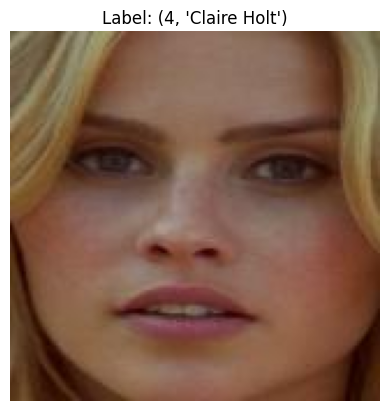

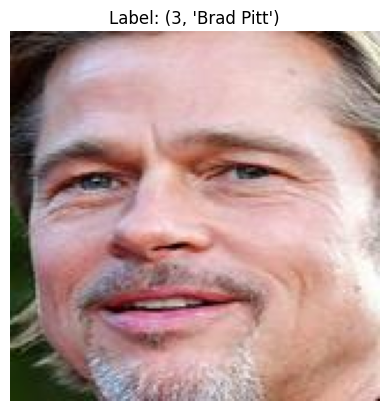

In [ ]:
# Function to unnormalize and display an image with its label
def imshow_with_label(image, label):
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Label: {label,label_mapping(label)}')
    plt.show()

# Get some random training samples
images, labels = next(iter(train_loader))

# Show each image separately with its label below it
for i in range(2):  # Show 3 images
    imshow_with_label(images[i], labels[i].item())

Epoch [1/10], Train Loss: 1.5778, Train Acc: 50.00%, Test Loss: 1.5091, Test Acc: 80.00%
Epoch [2/10], Train Loss: 1.4466, Train Acc: 95.00%, Test Loss: 1.4222, Test Acc: 100.00%
Epoch [3/10], Train Loss: 1.3701, Train Acc: 100.00%, Test Loss: 1.3113, Test Acc: 100.00%
Epoch [4/10], Train Loss: 1.2856, Train Acc: 100.00%, Test Loss: 1.1947, Test Acc: 100.00%
Epoch [5/10], Train Loss: 1.1498, Train Acc: 100.00%, Test Loss: 1.0473, Test Acc: 80.00%
Epoch [6/10], Train Loss: 0.9491, Train Acc: 100.00%, Test Loss: 0.8770, Test Acc: 80.00%
Epoch [7/10], Train Loss: 0.8097, Train Acc: 100.00%, Test Loss: 0.7085, Test Acc: 80.00%
Epoch [8/10], Train Loss: 0.6161, Train Acc: 100.00%, Test Loss: 0.5577, Test Acc: 80.00%
Epoch [9/10], Train Loss: 0.4661, Train Acc: 100.00%, Test Loss: 0.4424, Test Acc: 100.00%
Epoch [10/10], Train Loss: 0.3212, Train Acc: 100.00%, Test Loss: 0.3252, Test Acc: 100.00%
Training time: 22.373002767562866


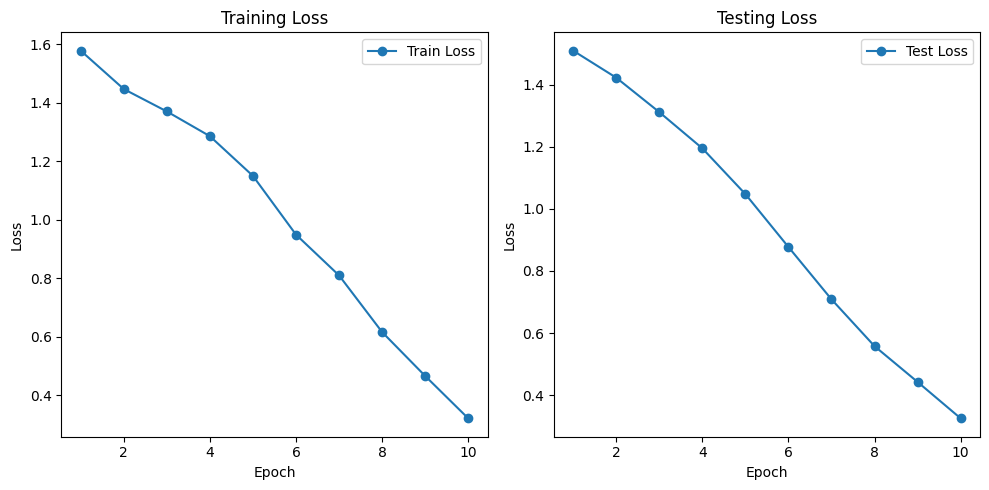

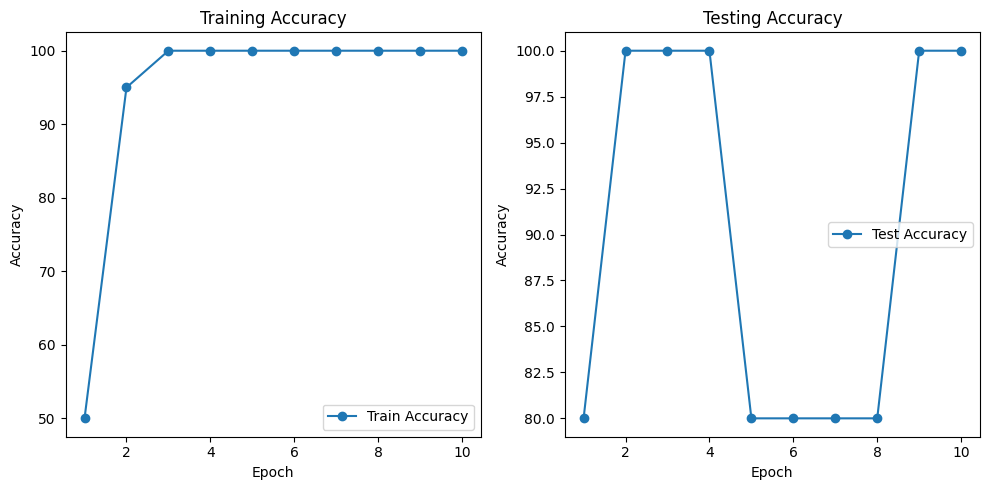

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from facenet_pytorch import InceptionResnetV1
import time

# Define the architecture of the MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Get the dimensionality of the output embeddings from the InceptionResnetV1 model
embedding_size = 512

# Define the dimensionality of the hidden layer in the MLP
hidden_size = 256  # You can adjust this according to your requirements

# Define the output size (number of classes)
output_size = 5

# Create an instance of the MLP
mlp = MLP(embedding_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

# Lists to store training and testing accuracy and loss
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

t0 = time.time()

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    # Lists to store predictions and true labels for accuracy calculation
    train_predicted = []
    train_labels = []

    for images, labels in train_loader:
        # Forward pass through the model to obtain the embeddings
        with torch.no_grad():
            embeddings = model(images)

        # Forward pass through the MLP to obtain the final output
        output = mlp(embeddings)

        # Compute the loss
        loss = criterion(output, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store predictions and true labels for accuracy calculation
        _, predicted = torch.max(output.data, 1)
        train_predicted.extend(predicted.tolist())
        train_labels.extend(labels.tolist())

    # Compute training accuracy and loss
    train_accuracy = (sum([1 for pred, label in zip(train_predicted, train_labels) if pred == label]) / len(train_labels)) * 100
    train_loss = loss.item()
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    # Evaluate the model on the test set
    test_predicted = []
    test_labels = []

    for images, labels in test_loader:
        # Forward pass through the model to obtain the embeddings
        embeddings = model(images)

        # Forward pass through the MLP to obtain the final output
        output = mlp(embeddings)

        # Store predictions and true labels for accuracy calculation
        _, predicted = torch.max(output.data, 1)
        test_predicted.extend(predicted.tolist())
        test_labels.extend(labels.tolist())

    # Compute testing accuracy and loss
    test_accuracy = (sum([1 for pred, label in zip(test_predicted, test_labels) if pred == label]) / len(test_labels)) * 100
    test_loss = criterion(output, labels).item()
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%')

print("Training time:", time.time()-t0)

# Plotting the training and testing accuracy and loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Plot testing accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import torch
from PIL import Image
from torchvision import transforms

# Set the model and MLP to evaluation mode
model.eval()
mlp.eval()

# Define the transformation pipeline for the input image
transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Resize to the input size expected by InceptionResnetV1
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the image
])

def predict_single_image(image_path):
    # Load and transform the image
    image = Image.open(image_path).convert('RGB')
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension

    # Obtain embeddings from the model
    with torch.no_grad():
        embeddings = model(image)

    # Pass embeddings through the MLP
    output = mlp(embeddings)

    # Get the predicted label
    x, predicted_label = torch.max(output, 1)

    if(x<1):
        return "Unknown"

    return predicted_label.item()

# Example usage:
image_path = '/content/Zac Efron_0.jpg'
predicted_label = predict_single_image(image_path)
print(f'Predicted Label: {predicted_label}')


Predicted Label: Unknown
